### Linear models for classification

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1. This prediction rule is common to all linear models for classifica‐
tion. Again, there are many different ways to find the coefficients (w) and the inter‐
cept (b)

For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) lin‐
ear classifier is a classifier that separates two classes using a line, a plane, or a hyper‐
plane. 


In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.8.4
NumPy version: 1.26.4
SciPy version: 1.13.1
IPython version: 8.24.0
scikit-learn version: 1.4.2


c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


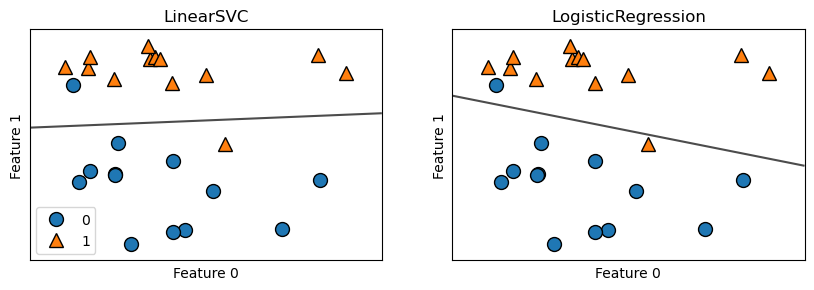

In [7]:
import mglearn.plot_2d_separator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

In this explanation, we're comparing two machine learning models, LinearSVC and LogisticRegression, which are used for classifying data into two classes. Both models try to find a straight line that separates the data into two groups: class 0 and class 1.

X-axis represents the first feature of the dataset.
Y-axis represents the second feature of the dataset.
The black line is the decision boundary that separates the two classes. If a new data point is above the black line, it will be classified as class 1, and if it's below the black line, it will be classified as class 0.

Key points:
Similar boundaries: Both models find similar lines to separate the data, but they don't classify all points perfectly—two points are misclassified by both models.

L2 regularization: Both models use L2 regularization, which helps prevent overfitting by penalizing large coefficients (the numbers the model uses to decide the line’s position). This is like Ridge regularization in regression.

Parameter C:

C controls how much regularization is applied.
High C value: The model focuses more on fitting the training data well, even if it means less regularization.
Low C value: The model focuses more on simplicity and keeping the coefficients close to zero, even if it doesn’t fit the training data perfectly.
Effect of C:

Low C: The model tries to fit the majority of the data, possibly ignoring outliers (data points far from the main group).
High C: The model focuses on classifying every individual point as correctly as possible, even if it leads to a more complex model.
So, adjusting C lets you control the balance between having a simple model and fitting the training data closely.

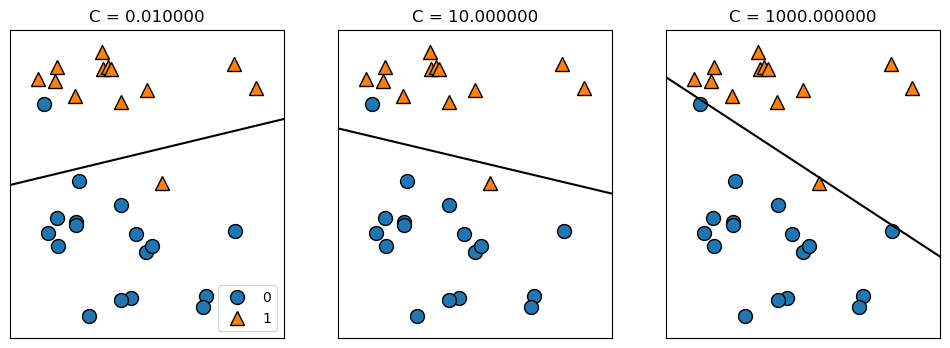

In [8]:
mglearn.plots.plot_linear_svc_regularization()

Left plot (small C value):
When C is small, there's a lot of regularization (the model is forced to be simple).
The decision boundary (the separating line) is almost horizontal.
The model focuses more on general patterns and ignores some points, misclassifying two points.
Center plot (medium C value):
As C increases, the model pays more attention to points that were misclassified.
This causes the decision boundary to tilt a bit to try to classify more points correctly.
Right plot (large C value):
With a very large C, the model really tries to classify every point correctly.
The decision boundary tilts even more, correctly classifying all points in class 0.
But one point in class 1 is still misclassified, and the model might now be overfitting, meaning it fits the training data too closely but might not work well on new data.
Overfitting:
The rightmost model tries too hard to fit the training data perfectly, which can make it less general and not as good at predicting new data. This is called overfitting.
Linear models:
In simple, low-dimensional data, linear models (which draw straight lines or planes) can be limited in what they can do. However, in more complex, high-dimensional data, they become very powerful, so it’s important to avoid overfitting by properly adjusting C.

### Let’s analyze LinearLogistic in more detail on the Breast Cancer dataset:

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
model:


In [11]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As expected, when moving more to the left along the scale shown in Figure 2-1 from
an already underfit model, both training and test set accuracy decrease relative to the
default parameters.
Finally, let’s look at the coefficients learned by the models with the three different set‐
tings of the regularization parameter C (Figure 2-17):


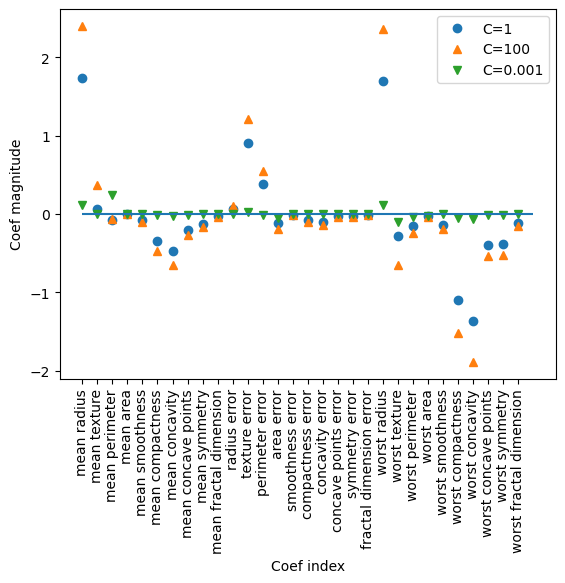

In [16]:
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. Inspecting the
plot more closely, we can also see an interesting effect in the third
coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient
is negative, while for C=0.001, the coefficient is positive, with a
magnitude that is even larger than for C=1. Interpreting a model
like this, one might think the coefficient tells us which class a fea‐
ture is associated with. For example, one might think that a high
“texture error” feature is related to a sample being “malignant.”
However, the change of sign in the coefficient for “mean perimeter”
means that depending on which model we look at, a high “mean
perimeter” could be taken as being either indicative of “benign” or
indicative of “malignant.” This illustrates that interpretations of
coefficients of linear models should always be taken with a grain of
salt.


If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features. Here is the coefficient plot and classifica‐
tion accuracies for L1 regularization (Figure 2-18):


Training accuracy of L1 logreg with C=0.001: 0.91
Test accuracy of L1 logreg with C=0.001: 0.92
Training accuracy of L1 logreg with C=1.000: 0.96
Test accuracy of L1 logreg with C=1.000: 0.96
Training accuracy of L1 logreg with C=100.000: 0.99
Test accuracy of L1 logreg with C=100.000: 0.98


c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


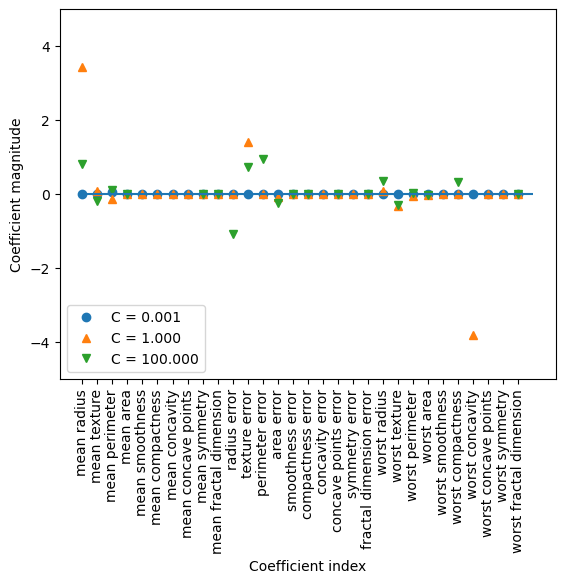

In [22]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
    print(f"Training accuracy of L1 logreg with C={C:.3f}: {lr_l1.score(X_train, y_train):.2f}")
    print(f"Test accuracy of L1 logreg with C={C:.3f}: {lr_l1.score(X_test, y_test):.2f}")
    plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc = 3)